## Finding sources in the VAST Pilot Survey

This notebook gives an example of how to use vast-tools in a notebook environment to perform a search of known sources or coordinates.

Below are the imports required for this example. The main import required from vast-tools is the Query object, with which queries can be initialised and run. Astropy objects are also imported as they are required as input to the query.

**Note** for large queries it is recommened to use the script version of `find_sources.py` included with vast-tools.

In [1]:
from vasttools.query import Query
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u
import matplotlib.pyplot as plt

In this example we will search for three sources of interest:

* 1AXG J134412+0016
* SN 2012dy
* PSR J2129-0429

If you don't enter any coordiantes then SIMBAD will be queried to find a match to the name entered. You cannot mix the SIMBAD search with coordinates - i.e. if you supply coordinates to search to need to supply the correct number of names.

The first steps is to set up our source names and then initialise the query. The input settings are similar to the `find_sources.py`.

In [2]:
source_names = ["1AXG J134412+0016", "SN 2012dy", "PSR J2129-0429"]

example_query = Query(
    source_names=source_names,
    matches_only=True, 
    epochs="all-vast", 
    crossmatch_radius=10., 
    output_dir='source-search-example-output', 
    base_folder='/import/ada1/askap/PILOT/release'
)

To check what will be searched you can look at the `query_df` attribute. Below we can see the sources we have set up to search.

Note that `1AXG J134412+0016` has been changed to `2SLAQ J134414.15+001642.2` as this is the identifier returned by SIMBAD.

In [3]:
example_query.query_df

,name,ra,dec,skycoord,stokes
0,2SLAQ J134414.15+001642.2,206.058966,0.278384,"<SkyCoord (ICRS): (ra, dec) in deg\n (206.0...",I
1,SN 2012dy,319.711250,-57.645140,"<SkyCoord (ICRS): (ra, dec) in deg\n (319.7...",I
2,PSR J2129-04,322.438710,-4.486640,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I


If we didn't use SIMBAD and entered coordinates we would build the query as below.

In [4]:
#Create SkyCoord of coordinates
coords_to_query = SkyCoord([206.058966, 319.711250, 322.438710], [0.278384, -57.645140, -4.486640], unit=(u.deg, u.deg))
source_names = ["1AXG J134412+0016", "SN 2012dy", "PSR J2129-0429"]

example_query = Query(
    coords=coords_to_query,
    source_names=source_names,
    matches_only=True, 
    epochs="all-vast", 
    crossmatch_radius=10., 
    output_dir='source-search-example-output', 
    base_folder='/import/ada1/askap/PILOT/release'
)

The settings can be double checked by looking at the `settings` attribute, which is a dictionary that contains the requested settings.

In [5]:
example_query.settings

{'epochs': ['1',
  '2',
  '3x',
  '4x',
  '5x',
  '6x',
  '7x',
  '8',
  '9',
  '10x',
  '11x',
  '12'],
 'stokes': 'I',
 'crossmatch_radius': <Angle 10. arcsec>,
 'max_sep': 1.0,
 'islands': False,
 'tiles': False,
 'no_rms': False,
 'matches_only': True,
 'search_around': False,
 'sort_output': False,
 'forced_fits': False,
 'forced_cluster_threshold': 1.5,
 'forced_allow_nan': False,
 'output_dir': 'source-search-example-output'}

The query can now be run, there are two main methods available:

1. `find_fields()`
2. `find_sources()`

`find_fields()` will only locate the fields that the contains the queried sources/coordinates.
`find_sources()` will build upon `find_fields()` and perform the source crossmatching from the selavy catalogues.

While `find_sources()` can be run directly (it will also run `find_fields()` for you) for the purposes of this example we'll run them separately.

### Running find_fields

Call the `find_fields()` method, it may take a few seconds to perform the search.

In [6]:
example_query.find_fields()

If you would like to check what has been found, you can look at the `fields_df` attribute that will show all the information.

In [7]:
example_query.fields_df

,name,ra,dec,skycoord,stokes,fields,primary_field,epoch,field,sbid,dateobs,planet
0,1AXG J134412+0016,206.058966,0.278384,"<SkyCoord (ICRS): (ra, dec) in deg\n (206.0...",I,[VAST_1351+00A],VAST_1351+00A,1,VAST_1351+00A,9669,2019-08-28 04:04:34.932,False
1,1AXG J134412+0016,206.058966,0.278384,"<SkyCoord (ICRS): (ra, dec) in deg\n (206.0...",I,[VAST_1351+00A],VAST_1351+00A,2,VAST_1351+00A,10337,2019-10-29 23:18:11.037,False
2,1AXG J134412+0016,206.058966,0.278384,"<SkyCoord (ICRS): (ra, dec) in deg\n (206.0...",I,[VAST_1351+00A],VAST_1351+00A,5x,VAST_1351+00A,11148,2020-01-10 22:00:20.515,False
3,1AXG J134412+0016,206.058966,0.278384,"<SkyCoord (ICRS): (ra, dec) in deg\n (206.0...",I,[VAST_1351+00A],VAST_1351+00A,8,VAST_1351+00A,11584,2020-01-25 21:25:25.682,False
4,1AXG J134412+0016,206.058966,0.278384,"<SkyCoord (ICRS): (ra, dec) in deg\n (206.0...",I,[VAST_1351+00A],VAST_1351+00A,9,VAST_1351+00A,11615,2020-01-26 21:21:41.180,False
5,1AXG J134412+0016,206.058966,0.278384,"<SkyCoord (ICRS): (ra, dec) in deg\n (206.0...",I,[VAST_1351+00A],VAST_1351+00A,12,VAST_1351+00A,15687,2020-08-29 06:08:31.249,False
6,PSR J2129-0429,322.438710,-4.486640,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I,"[VAST_2118-06A, VAST_2143-06A]",VAST_2118-06A,1,VAST_2118-06A,9668,2019-08-27 18:52:00.556,False
7,PSR J2129-0429,322.438710,-4.486640,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I,"[VAST_2118-06A, VAST_2143-06A]",VAST_2118-06A,3x,VAST_2118-06A,10335,2019-10-29 13:39:33.996,False
8,PSR J2129-0429,322.438710,-4.486640,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I,"[VAST_2118-06A, VAST_2143-06A]",VAST_2118-06A,2,VAST_2118-06A,10342,2019-10-30 10:11:56.913,False
9,PSR J2129-0429,322.438710,-4.486640,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I,"[VAST_2118-06A, VAST_2143-06A]",VAST_2118-06A,5x,VAST_2118-06A,11169,2020-01-11 05:40:11.007,False


The results of find_fields can be written to a file if you you would like to:

In [8]:
example_query.write_find_fields()

### Running find_sources

Now we would like to find the actual crossmatches (if any) to the sources/coordiantes. Now we can call `find_sources()`, which again will take a few seconds to complete:

In [9]:
example_query.find_sources()

### Looking at the find_sources results

The results of `find_sources()` are stored in the results attribute:

In [10]:
example_query.results

name
1AXG J134412+0016    <vasttools.source.Source object at 0x7fcd45667...
SN 2012dy            <vasttools.source.Source object at 0x7fcd45644...
PSR J2129-0429       <vasttools.source.Source object at 0x7fcd45963...
Name: name, dtype: object

It is a pandas series object, which contains a vast-tools `Source` object for each result, accessed by using the souce name as the index. 

For example lets look at the `PSR J2129-04` result. For convenience we'll assign the object to the variable `my_source`.

In [11]:
my_source = example_query.results['PSR J2129-0429']

Below will show you all the plotting and searching you can do with a source object, which includes:

* Viewing and saving the measurements.
* Plotting a lightcurve.
* Calculate variability metrics.
* Displaying the source cutout from the FITS file per epoch.
* Display all the cutouts together.
* Create an astroquery 'SkyView' plot with ASKAP contours per epoch.
* Search other services such as SIMBAD or CASDA.

In [12]:
my_source.measurements

,name,ra,dec,skycoord,stokes,fields,primary_field,epoch,field,sbid,...,spectral_curvature,spectral_index_err,spectral_curvature_err,rms_image,has_siblings,fit_is_estimate,spectral_index_from_TT,flag_c4,comment,detection
0,PSR J2129-0429,322.43871,-4.48664,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I,"[VAST_2118-06A, VAST_2143-06A]",VAST_2118-06A,1,VAST_2118-06A,9668,...,NaN,NaN,NaN,0.251606,NaN,NaN,NaN,NaN,NaN,False
1,PSR J2129-0429,322.43871,-4.48664,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I,"[VAST_2118-06A, VAST_2143-06A]",VAST_2118-06A,3x,VAST_2118-06A,10335,...,NaN,NaN,NaN,0.219291,NaN,NaN,NaN,NaN,NaN,False
2,PSR J2129-0429,322.43871,-4.48664,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I,"[VAST_2118-06A, VAST_2143-06A]",VAST_2118-06A,2,VAST_2118-06A,10342,...,NaN,NaN,NaN,0.237447,NaN,NaN,NaN,NaN,NaN,False
3,PSR J2129-0429,322.43871,-4.48664,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I,"[VAST_2118-06A, VAST_2143-06A]",VAST_2118-06A,5x,VAST_2118-06A,11169,...,-99.0,0.01,0.0,0.249000,0.0,0.0,1.0,0.0,NaN,True
4,PSR J2129-0429,322.43871,-4.48664,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I,"[VAST_2118-06A, VAST_2143-06A]",VAST_2118-06A,6x,VAST_2118-06A,11257,...,-99.0,0.00,0.0,0.278000,0.0,0.0,1.0,0.0,NaN,True
5,PSR J2129-0429,322.43871,-4.48664,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I,"[VAST_2118-06A, VAST_2143-06A]",VAST_2118-06A,8,VAST_2118-06A,11429,...,-99.0,0.01,0.0,0.213000,0.0,0.0,1.0,0.0,NaN,True
6,PSR J2129-0429,322.43871,-4.48664,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I,"[VAST_2118-06A, VAST_2143-06A]",VAST_2118-06A,9,VAST_2118-06A,11501,...,-99.0,0.00,0.0,0.242000,0.0,0.0,1.0,0.0,NaN,True
7,PSR J2129-0429,322.43871,-4.48664,"<SkyCoord (ICRS): (ra, dec) in deg\n (322.4...",I,"[VAST_2118-06A, VAST_2143-06A]",VAST_2118-06A,12,VAST_2118-06A,15711,...,NaN,NaN,NaN,0.266251,NaN,NaN,NaN,NaN,NaN,False


In [13]:
my_source.write_measurements()

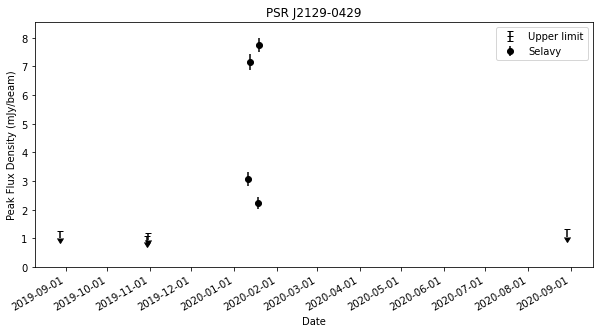

In [14]:
lightcurve = my_source.plot_lightcurve(figsize=(10,5))
lightcurve

In [17]:
my_source.calc_eta_and_v_metrics()

(1063.6368617376284, 0.8766429479101637)

In [19]:
epoch6x_cutout = my_source.save_png_cutout('6x', plot_dpi=300)
epoch6x_cutout

In [18]:
all_cutouts = my_source.save_all_png_cutouts(dpi=200)
all_cutouts

TypeError: save_all_png_cutouts() got an unexpected keyword argument 'dpi'

You can force resizing the cutout data by including `force=True` and a new `size` value (which is an Astropy Angle)

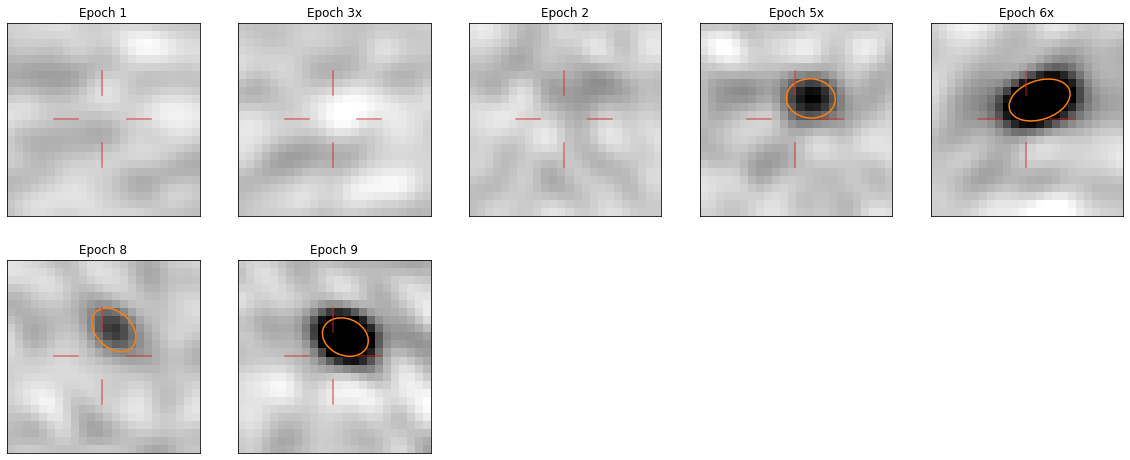

In [18]:
all_cutouts = my_source.show_all_png_cutouts(columns=5, figsize=(20, 8), force=True, size=Angle(1*u.arcmin))
all_cutouts

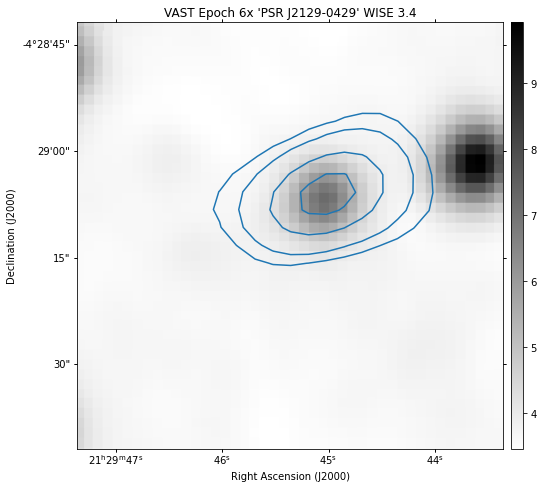

In [19]:
wise_3_4_contour_epoch6x = my_source.skyview_contour_plot('6x', 'WISE 3.4')
wise_3_4_contour_epoch6x

In [20]:
simbad_results = my_source.simbad_search()
simbad_results

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,RA_d,DEC_d,RA_d_1,DEC_d_1
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,deg,deg,deg,deg
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float64,float64,float64,float64
PSR J2129-04,21 29 45.29,-04 29 11.9,6,6,--,--,0,D,,2014ApJ...795...72L,322.43871000,-4.48664000,322.43871000,-4.48664000
CRTS J212945.0-042906,21 29 45.0466,-04 29 06.973,14,14,0.080,0.082,90,A,O,2018yCat.1345....0G,322.43769431,-4.48527042,322.43769431,-4.48527042


In [21]:
casda_results = my_source.casda_search()
casda_results
# Uncomment the line below to show that there are no other observations other than VAST
# casda_results[casda_results['obs_collection'] != 'ASKAP Pilot Survey for VAST']

dataproduct_type,calib_level,obs_collection,obs_id,obs_publisher_did,access_url,access_format,access_estsize,target_name,s_ra,s_dec,s_fov,s_region,s_resolution,s_xel1,s_xel2,t_min,t_max,t_exptime,t_resolution,t_xel,em_min,em_max,em_res_power,em_xel,o_ucd,pol_states,pol_xel,facility_name,instrument_name,dataproduct_subtype,em_ucd,em_unit,em_resolution,s_resolution_min,s_resolution_max,s_ucd,s_unit,obs_release_date,quality_level,thumbnail_id,filename
,,,,,,,kbyte,,deg,deg,deg,,arcsec,,,d,d,s,s,,m,m,,,,,,,,,,,m,arcsec,arcsec,,,,,,
bytes255,int32,bytes255,bytes255,bytes255,bytes2000,bytes255,int64,bytes255,float64,float64,float64,bytes200,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,int64,bytes255,bytes255,int64,bytes255,bytes255,bytes255,bytes255,bytes255,float64,float64,float64,bytes255,bytes255,bytes24,bytes15,int64,bytes1000
cube,2,ASKAP Pilot Survey for VAST,10335,cube-11384,https://data.csiro.au/casda_vo_proxy/vo/datalink/links?ID=cube-11384,application/x-votable+xml;content=datalink,732640,,319.65244199709,0.0030764449085466,90.44801311727238,POLYGON ICRS 324.43523536599025 -4.760100044734678 314.87693985350995 -4.759294938768922 314.87694174021016 4.758990146798202 324.4352205684499 4.758186275179001,13.55601412618452,13700,13690,--,--,0.0,--,1,0.3377977442375203,0.3377977446181413,887491000.0,1,phot.flux.density,/I/,1,ASKAP,,cont.restored.t0,em.freq,m,3.8062103469016506e-10,11.517425927297532,13.55601412618452,pos.eq,deg,,NOT_VALIDATED,--,image.i.SB10335.cont.VAST_2118+00A.linmos.taylor.0.restored.fits
cube,2,ASKAP Pilot Survey for VAST,10335,cube-11403,https://data.csiro.au/casda_vo_proxy/vo/datalink/links?ID=cube-11403,application/x-votable+xml;content=datalink,735959,,319.65225903505,-6.2988994266696,90.85795717591431,POLYGON ICRS 324.52427381513013 -11.046061762855985 314.7973404362898 -11.05504661381398 314.87633600109024 -1.5147793466120107 324.4258189496801 -1.5059716386147006,17.105662264809567,13730,13722,--,--,0.0,--,1,0.3377977442375203,0.3377977446181413,887491000.0,1,phot.flux.density,/I/,1,ASKAP,,cont.restored.t0,em.freq,m,3.8062103469016506e-10,10.986972588088955,17.105662264809567,pos.eq,deg,,NOT_VALIDATED,--,image.i.SB10335.cont.VAST_2118-06A.linmos.taylor.0.restored.fits
cube,2,ASKAP Pilot Survey for VAST,10335,cube-11422,https://data.csiro.au/casda_vo_proxy/vo/datalink/links?ID=cube-11422,application/x-votable+xml;content=datalink,732640,,325.86077116379,0.0030764449085466,90.44801311727238,POLYGON ICRS 330.64356453269016 -4.760100044734678 321.08526902020986 -4.759294938768922 321.08527090691007 4.758990146798202 330.6435497351498 4.758186275179001,13.678040699693495,13700,13690,--,--,0.0,--,1,0.3377977442375203,0.3377977446181413,887491000.0,1,phot.flux.density,/I/,1,ASKAP,,cont.restored.t0,em.freq,m,3.8062103469016506e-10,11.610610661265913,13.678040699693495,pos.eq,deg,,NOT_VALIDATED,--,image.i.SB10335.cont.VAST_2143+00A.linmos.taylor.0.restored.fits
cube,2,ASKAP Pilot Survey for VAST,10335,cube-11441,https://data.csiro.au/casda_vo_proxy/vo/datalink/links?ID=cube-11441,application/x-votable+xml;content=datalink,735959,,325.86059236845,-6.2988994266696,90.85795717591431,POLYGON ICRS 330.73260714852984 -11.046061762855985 321.00567376969013 -11.05504661381398 321.08466933448994 -1.5147793466120107 330.63415228307986 -1.5059716386147006,21.324949800827113,13730,13722,--,--,0.0,--,1,0.3377977442375203,0.3377977446181413,887491000.0,1,phot.flux.density,/I/,1,ASKAP,,cont.restored.t0,em.freq,m,3.8062103469016506e-10,10.664618102874936,21.324949800827113,pos.eq,deg,,NOT_VALIDATED,--,image.i.SB10335.cont.VAST_2143-06A.linmos.taylor.0.restored.fits
cube,2,ASKAP Pilot Survey for VAST,10342,cube-15445,https://data.csiro.au/casda_vo_proxy/vo/datalink/links?ID=cube-15445,application/x-votable+xml;content=datalink,732640,,319.65244199709,0.0030764449085466,90.44801311727238,POLYGON ICRS 324.43523536599025 -4.760100044734678 314.87693985350995 -4.759294938768922 314.876941740210